系数a: 28.45970098385863
系数b: 50.99897269883754
系数c: -2.0264279267159484
R Squared: 0.9941038922002213
MSE: 0.275595761036267
RMSE: 0.5249721526293247


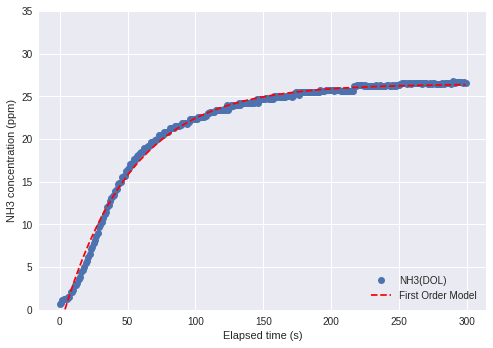

In [0]:
# 0028;a,b未知;上升
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from statistics import mean
from sklearn import metrics
 
#自定义函数 e指数形式
def func(x, a, b):
    #return a*(1 - np.exp(-1/b * x))
    return a*(1 - np.exp(-x / b))
  
def func_p(x, a, b, c):
    #return a*(1 - np.exp(-1/b * x))
    return a*(1 - np.exp(-x / b)) + c

  
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

  
#R2
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
   
temp_data = pd.read_csv(r'0028.csv')


x = np.arange(0, 300, 1)
y = temp_data['0028'][50: 350]

y = np.array(y)

#定义x、y散点坐标
'''
x = np.arange(1, 16, 1)
num = [4.00, 5.20, 5.900, 6.80, 7.34,
       8.57, 9.86, 10.12, 12.56, 14.32,
       15.42, 16.50, 18.92, 19.58, 20.00]
y = np.array(num)
'''

 
#非线性最小二乘法拟合
popt, pcov = curve_fit(func_p, x, y)
#获取popt里面是拟合系数
a = popt[0] 
b = popt[1]
c = popt[2]
yvals = func_p(x,a,b,c) #拟合y值

print(u'系数a:', a)
print(u'系数b:', b)
print(u'系数c:', c)
#print(yvals)

yvals = np.array(yvals)
r_squared = coefficient_of_determination(y,yvals)
print('R Squared:', r_squared)
print("MSE:",metrics.mean_squared_error(y, yvals))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, yvals)))




#绘图
plot1 = plt.plot(x, y, 'o',label='NH3(DOL)')
plot2 = plt.plot(x, yvals, 'r--',label='First Order Model')
plt.xlabel('Elapsed time (s)')
plt.ylabel('NH3 concentration (ppm)')
plt.legend(loc=4) #指定legend的位置右下角
plt.ylim(ymin = 0)
plt.ylim(ymax = 35)
#plt.title('curve_fit')
plt.show()

系数a: 25.984971820419304
系数b: 27.597103888402653
系数c: 1.9016707689009391
R Squared: 0.9865484906348937
MSE: 0.35821577437043045
RMSE: 0.598511298448434


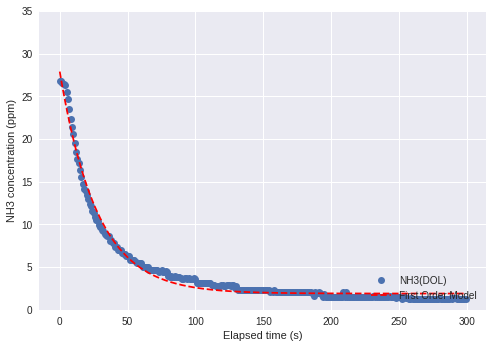

In [0]:
# 0028;a,b未知;下降
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical
from statistics import mean
from sklearn import metrics
 
#自定义函数 e指数形式
def func(x, a, b):
    #return a*(1 - np.exp(-b/x))
    return a*(np.exp(-x / b))
  
def func_p(x, a, b,c):
    #return a*(1 - np.exp(-b/x))
    return a*(np.exp(-x / b)) + c
  


  
def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

  
#R2
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
   
temp_data = pd.read_csv(r'0028.csv')


x = np.arange(0, 300, 1)
y = temp_data['0028'][440: 740]

y = np.array(y)

#定义x、y散点坐标
'''
x = np.arange(1, 16, 1)
num = [4.00, 5.20, 5.900, 6.80, 7.34,
       8.57, 9.86, 10.12, 12.56, 14.32,
       15.42, 16.50, 18.92, 19.58, 20.00]
y = np.array(num)
'''

 
#非线性最小二乘法拟合
popt, pcov = curve_fit(func_p, x, y)
#获取popt里面是拟合系数
a = popt[0] 
b = popt[1]
c = popt[2]
yvals = func_p(x,a,b,c) #拟合y值

print(u'系数a:', a)
print(u'系数b:', b)
print(u'系数c:', c)
#print(yvals)

yvals = np.array(yvals)
r_squared = coefficient_of_determination(y,yvals)
print('R Squared:', r_squared)
print("MSE:",metrics.mean_squared_error(y, yvals))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y, yvals)))




#绘图
plot1 = plt.plot(x, y, 'o',label='NH3(DOL)')
plot2 = plt.plot(x, yvals, 'r--',label='First Order Model')
plt.xlabel('Elapsed time (s)')
plt.ylabel('NH3 concentration (ppm)')
plt.legend(loc=4) #指定legend的位置右下角
plt.ylim(ymin = 0)
plt.ylim(ymax = 35)
#plt.title('curve_fit')
plt.show()